In [1]:
import cv2
import numpy as np
from SVD import SVD
import matplotlib.pyplot as plt

## Read image "lena.jpg"

In [2]:
lena = "Data\\lena_gray.jpg"
images = cv2.imread(lena, 0)
img_rank = np.linalg.matrix_rank(images)
print("images shape: ", images.shape)
print("image rank: ", img_rank)
images

images shape:  (512, 512)
image rank:  512


array([[161, 162, 163, ..., 170, 152, 128],
       [162, 162, 162, ..., 171, 154, 129],
       [163, 163, 162, ..., 170, 155, 128],
       ...,
       [ 44,  44,  48, ..., 102, 101,  99],
       [ 45,  44,  51, ..., 103, 108, 105],
       [ 43,  45,  57, ..., 102, 110, 107]], dtype=uint8)

In [3]:
print("Images rank:", np.linalg.matrix_rank(images))

Images rank: 512


## Show image

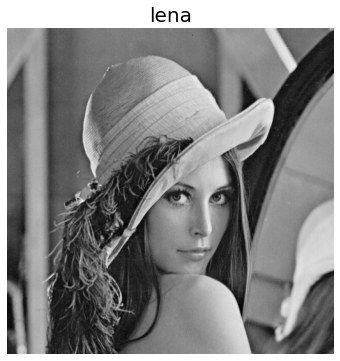

In [4]:
plt.figure(figsize=(6, 6))
plt.imshow(images, cmap="gray")
plt.title("lena", fontsize=20)
plt.axis("off")
plt.show()

## Normalize function
# $\hat{x} = \frac{x-µ}{σ}$

In [5]:
def normalize(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    std[std==0.] = 1.
    norm = (X - mean) / std
    return norm, mean, std

## Normalize images

In [6]:
# matx = images
matx, mean, std = normalize(images)
print("Images after normalize:")
matx

Images after normalize:


array([[ 1.68466871,  1.70794682,  1.75640777, ...,  0.71429588,
         0.39363084, -0.04133148],
       [ 1.71013296,  1.70794682,  1.73045375, ...,  0.732357  ,
         0.42969401, -0.02325998],
       [ 1.73559721,  1.7333652 ,  1.73045375, ...,  0.71429588,
         0.44772559, -0.04133148],
       ...,
       [-1.29464799, -1.29142286, -1.22830433, ..., -0.51385985,
        -0.52597984, -0.5654047 ],
       [-1.26918374, -1.29142286, -1.15044227, ..., -0.49579874,
        -0.39975876, -0.45697576],
       [-1.32011223, -1.26600447, -0.99471816, ..., -0.51385985,
        -0.3636956 , -0.42083277]])

## Singular values decomposition
## $ A = UΣV^{T}$

In [7]:
svd = SVD(matx)
U, E, Vt = svd.svd()
print("Vector U shape:", U.shape)
print("Vector Σ shape:", E.shape)
print("Vector V^T shape:", Vt.shape)

Vector U shape: (512, 512)
Vector Σ shape: (512,)
Vector V^T shape: (512, 512)


## Vector $U$

In [8]:
print("vector U:\n", U)

vector U:
 [[ 4.07651257e-02  4.09822459e-03  5.88214814e-02 ...  1.22747212e-01
   1.15447863e-01  4.64285281e-05]
 [ 4.07970197e-02  4.02230576e-03  5.87309757e-02 ... -1.47380634e-01
  -1.43848306e-01 -5.55497386e-05]
 [ 4.07825557e-02  4.20323030e-03  5.89315887e-02 ... -9.25222524e-02
   8.22481695e-02  2.58958911e-05]
 ...
 [ 6.97618272e-03  6.21405923e-02 -3.46519249e-02 ... -4.43794098e-02
  -4.38844263e-02 -1.68135088e-05]
 [ 6.18033415e-03  6.12730019e-02 -3.60133908e-02 ... -5.40381410e-03
   6.32385891e-02  2.81120330e-05]
 [ 6.47234991e-03  6.16195474e-02 -3.60186451e-02 ...  2.83784177e-02
  -1.15197220e-02 -5.79456918e-06]]


## Vector $Σ$

In [9]:
print("Vector Σ:\n", E)

Vector Σ:
 [2.42233216e+02 1.99141525e+02 1.55814755e+02 1.46245311e+02
 1.30439719e+02 1.12584330e+02 1.05434004e+02 8.09177774e+01
 7.15568993e+01 6.80467699e+01 6.51004860e+01 5.77529535e+01
 5.67133610e+01 5.44461505e+01 5.23931617e+01 4.80857755e+01
 4.61015036e+01 4.54626467e+01 4.40969066e+01 4.04658279e+01
 3.90570329e+01 3.71350607e+01 3.70155168e+01 3.46926842e+01
 3.43161343e+01 3.36987428e+01 3.25488786e+01 3.16088102e+01
 3.02491220e+01 2.92201718e+01 2.89732253e+01 2.84327769e+01
 2.74662771e+01 2.69552611e+01 2.57449423e+01 2.48256772e+01
 2.46995479e+01 2.45083663e+01 2.34211358e+01 2.32277155e+01
 2.25331567e+01 2.18728015e+01 2.17167488e+01 2.14575139e+01
 2.09359038e+01 1.99179887e+01 1.98965997e+01 1.96348948e+01
 1.85795432e+01 1.84519843e+01 1.80228876e+01 1.77903780e+01
 1.74978466e+01 1.71094195e+01 1.66583308e+01 1.65089388e+01
 1.64082956e+01 1.62864207e+01 1.58723869e+01 1.55864369e+01
 1.54725694e+01 1.51950096e+01 1.50033311e+01 1.46769024e+01
 1.43243561e+

## Vector $V^{T}$

In [10]:
print("Vector V^T\n", Vt[:5])

Vector V^T
 [[ 0.05831887  0.05867344  0.05849449 ... -0.0177613  -0.01725794
  -0.01556897]
 [-0.01173709 -0.01161673 -0.00757839 ... -0.09439475 -0.09436071
  -0.09464075]
 [ 0.08475049  0.08459053  0.08419386 ... -0.03850564 -0.03811066
  -0.03701291]
 [ 0.01929792  0.01955881  0.01916226 ... -0.01142913 -0.01269729
  -0.01497827]
 [ 0.03517914  0.03461724  0.03927697 ...  0.00377825  0.00528464
   0.0070513 ]]


## Find matrix rapproximation with error $<=$ 20%

In [11]:
rank = 1
error = None
matx_rank = None
while True:
    matx_rank, error = svd.matrix_approximation(rank)
    if error <= 0.2:
        break
    else: rank += 1
print("with rank=", rank, "-Error=", error)

with rank= 102 -Error= 0.19855902286497382


## Show orginal image and image with error <= 20%

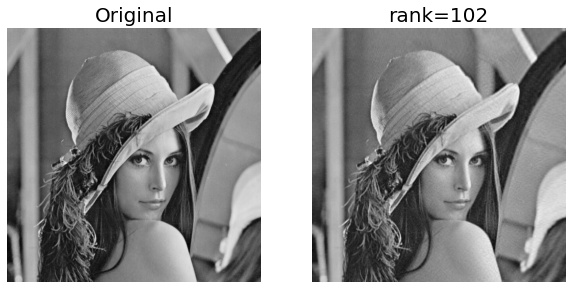

In [12]:
reconstruct = matx_rank * std + mean
img = [images, reconstruct]
title = ["Original", "rank="+str(rank)]
plt.figure(figsize=(10, 10))
for i in range(2):
    plt.subplot(120 + i + 1)
    plt.imshow(img[i], cmap="gray")
    plt.title(title[i], fontsize=20)
    plt.axis("off")
plt.show()

## Try with different ranks and show them
### Rank = [4, 10, 15, 25, 50]

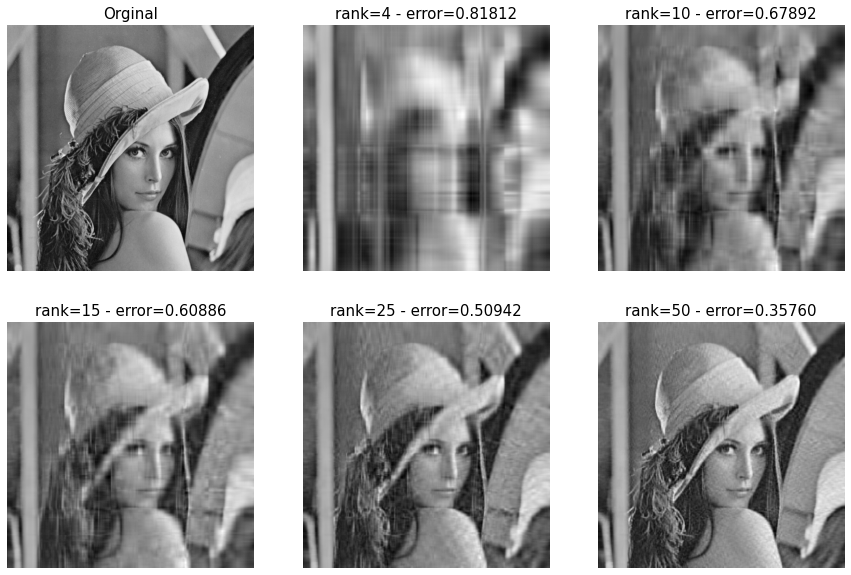

In [13]:
matx_app = dict()
errors = dict()

# Calculate matrix rapproximation with rank [4, 10, 15, 25, 50]
for ranks in [4, 10, 15, 25, 50]:
    matx_app[ranks], e = svd.matrix_approximation(ranks)
    matx_app[ranks] = matx_app[ranks] * std + mean
    errors[ranks] = e
fig, ax = plt.subplots(2, 3)
fig.set_size_inches(15, 10)

# Show images
# Original image
ax[0, 0].imshow(images, cmap="gray")
ax[0, 0].set_title("Orginal", fontsize=15)
ax[0, 0].axis("off")

# Image rank 4
ax[0, 1].imshow(matx_app[4], cmap="gray")
ax[0, 1].set_title("rank={:d} - error={:.5f}".format(4, errors[4]), fontsize=15)
ax[0, 1].axis("off")

# Image rank 10
ax[0, 2].imshow(matx_app[10], cmap="gray")
ax[0, 2].set_title("rank={:d} - error={:.5f}".format(10, errors[10]), fontsize=15)
ax[0, 2].axis("off")

# Image rank 15
ax[1, 0].imshow(matx_app[15], cmap="gray")
ax[1, 0].set_title("rank={:d} - error={:.5f}".format(15, errors[15]), fontsize=15)
ax[1, 0].axis("off")

# Image rank 25
ax[1, 1].imshow(matx_app[25], cmap="gray")
ax[1, 1].set_title("rank={:d} - error={:.5f}".format(25, errors[25]), fontsize=15)
ax[1, 1].axis("off")

# Image rank 50
ax[1, 2].imshow(matx_app[50], cmap="gray")
ax[1, 2].set_title("rank={:d} - error={:.5f}".format(50, errors[50]), fontsize=15)
ax[1, 2].axis("off")
plt.show()


In [14]:
m,_ = svd.matrix_approximation(img_rank)
m * std + mean

array([[161., 162., 163., ..., 170., 152., 128.],
       [162., 162., 162., ..., 171., 154., 129.],
       [163., 163., 162., ..., 170., 155., 128.],
       ...,
       [ 44.,  44.,  48., ..., 102., 101.,  99.],
       [ 45.,  44.,  51., ..., 103., 108., 105.],
       [ 43.,  45.,  57., ..., 102., 110., 107.]])

In [15]:
images

array([[161, 162, 163, ..., 170, 152, 128],
       [162, 162, 162, ..., 171, 154, 129],
       [163, 163, 162, ..., 170, 155, 128],
       ...,
       [ 44,  44,  48, ..., 102, 101,  99],
       [ 45,  44,  51, ..., 103, 108, 105],
       [ 43,  45,  57, ..., 102, 110, 107]], dtype=uint8)